In [5]:
from sympy import *
init_printing()

In [36]:
mw, yl, yb, xb, xl, M = symbols('m_w, y_l, y_b, x_b, x_l, M')
eta, El, Eb, zl, zb = symbols('eta, E_l, E_b, z_l, z_b')
b = Eb * cosh(eta) - zb * sinh(eta)
l = El * cosh(eta) - zl * sinh(eta)

D1 = (mw**4 / 4
      * ((yl*b - yb*l)**2
         - (xb*l-xl*b)**2)
      * (2*(xl*b - xb*l))**2)

D2 = ((l*M-b*mw**2)**2
      * (xb*l-xl*b)**2
      * (xl**2 * yl**2 + l**2))

D3 = (mw**2 * (l*M-b*mw**2)
      * 2 *(xl*b - xb*l)
      * (xl * (xb*l-xl*b) - yl * (yl*b-yb*l) * (xb*l-xl*b)))

D = D1 + D2 + D3

D

In [41]:
mt, mb = symbols('mb, mt')
M = mt**2 - mw**2 - mb**2 - 2 * (El*Eb - xl*xb - yl*yb - zl*zb)
new = (l**2 * (mw**4 * (yb**2 - xb**2)
              + M**2 * (xl**2 + yl**2 + l**2)
              - 2 * mw**2 * M *(xl * xb + yl * yb))
       + b**2 * (2 * mw**4 * xl**2)
       + b * l * (4 * mw**4 * xb * xl - 2 * l**2 * M * mw**2))
#solve(new, eta)

In [69]:
import numpy as np
xl, yl, zl, El =  -17.50733, 27.277040, -44.69849, 55.213211
xb, yb, zb, Eb =  0.1868691, 66.601593, 39.553756, 77.610229
mt, mw, mb = 169.70, 76.75, 4.80
eta = -0.79
M = mt**2 - mw**2 - mb**2 - 2 * (El*Eb - xl*xb - yl*yb - zl*zb)
l = El * np.cosh(eta) - zl * np.sinh(eta)
b = Eb * np.cosh(eta) - zb * np.sinh(eta)
val = (l**2 * (mw**4 * (yb**2 - xb**2)
              + M**2 * (xl**2 + yl**2 + l**2)
              - 2 * mw**2 * M *(xl * xb + yl * yb))
       + b**2 * (2 * mw**4 * xl**2)
       + b * l * (4 * mw**4 * xb * xl - 2 * l**2 * M * mw**2))
print(val)

-1.77207811853e+14


In [177]:


"""
def D(eta):
    l = El * np.cosh(eta) - zl * np.sinh(eta)
    b = Eb * np.cosh(eta) - zb * np.sinh(eta)
    return (mw**4 / 4 * (((yl*b - yb * l)**2
                   -(xb*l - xl*b)**2)
                  * (2 * (xl*b - xb*l))**2)
     + (l*M - b*mw**2)**2
      * (xb * l - xl * b)**2
      * (xl**2 + yl**2 + l**2)
     + mw**2 * 2
      * (l*M - b * mw**2) * (xl * b - xb * l)
      * (xl * (xb * l - xl * b)**2 - yl * (yl * b - yb * l) * (xb * l - xl * b)))
"""

def D(eta):
    xl, yl, zl, El =  -121.1420, -46.92312, 186.88299, 227.60145
    xb, yb, zb, Eb =  -98.54734, 65.439971, 175.97573, 212.09542
    mt, mw, mb = 172.42, 79.06, 4.80
    M = mt**2 - mw**2 - mb**2 - 2 * (El*Eb - xl*xb - yl*yb - zl*zb)
    
    l = El * np.cosh(eta) - zl * np.sinh(eta)
    b = Eb * np.cosh(eta) - zb * np.sinh(eta)

    a = (yl*b - yb * l) / (xb * l - xl * b)
    b = (El * M - b * mw**2) / (2 * (xl * b - xb * l))

    c = a**2 + 1 - (xl / l * a + yl / l)**2
    d = 2 * a * b - 2 * (mw**2 / (2 * l) + xl / l * b) * (xl / l * a + yl / l)
    f = b**2 - (mw / (2 * l) + xl / l * b)**2    
    
    disk = d**2 - 4 * c * f
    return disk # - d / (2 * c) + 1 / (2 * c) * np.sqrt(disk)

-33663.8714896


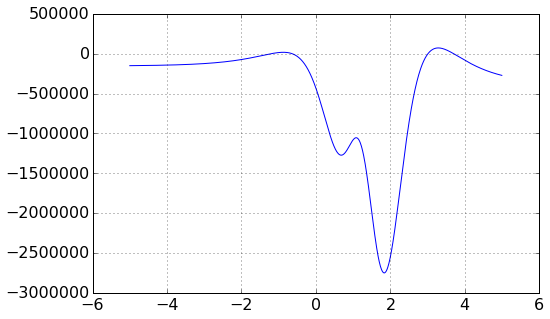

In [178]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['font.size'] = 16

print(D(-0.5))

data = np.genfromtxt('eta-disk.txt', unpack=True)
# print(data.shape)
# eta_c = data[0]
# disk_c = data[1]

etas = np.linspace(-5, 5, 1000)
plt.plot(etas, D(etas))
# plt.plot(eta_c, disk_c)
# plt.ylim(-1e5, 1e6)
plt.grid('on')